**Application of Data Mining in Yelp Dataset**

Team Members:
1.   Yinghao Lin
2.   Jihye Park
3.   Sai Pothuraju
4.   Nishant Shakya
5.   Chaoqun Yu


In [1]:
# mount the shared drive which contains the data files

from google.colab import drive
drive.mount('/content/drive')
currentFilePath = '/content/drive/Shared drives/CSC579 CSC493 - Data Mining and Knowledge Discovery/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# EDA
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import json
from pandas.io.json import json_normalize

# Exploratory Data Analysis (EDA)

Functions to import JSON into pandas dataframe. pandas read_json was throwing out of memory exception. Reading and loading using python File I/O helped here.

In [0]:
# function to read a large JSON file in smaller chunks
def getDataFrameByChunks(file):
  jsonReader = pd.read_json(currentFilePath + file, lines=True, chunksize=1000)
  for chunk in jsonReader:
    print(chunk)

# function to read a JSON file
def getDataFrame(file):
  return pd.read_json(currentFilePath + file, lines=True)

# function to read the JSON file without using pandas readJSON (works for large JSON files)
def getDataFramePython(file):
  with open(currentFilePath + file, 'r') as f:
    data = f.readlines()
    data = list(map(json.loads, data)) 
  return pd.DataFrame(data)
  

In [0]:
business_df = getDataFrame('business.json');

In [5]:
business_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

Only filter restaurants

In [0]:
restaurants_with_categeories = business_df[business_df.categories.notnull()]
restaurants_df = restaurants_with_categeories[restaurants_with_categeories.categories.str.contains('Restaurant')]

In [7]:
restaurants_df.head()

address  ... state
1           30 Eglinton Avenue W  ...    ON
2      10110 Johnston Rd, Ste 15  ...    NC
11       2450 E Indian School Rd  ...    AZ
13               5981 Andrews Rd  ...    OH
17  1775 E Tropicana Ave, Ste 29  ...    NV

[5 rows x 14 columns]

Top 5 states with highest number of restaurants

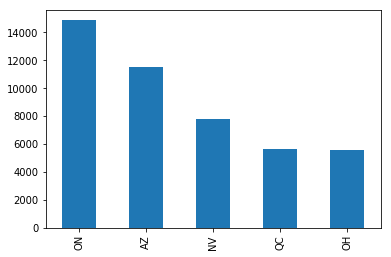

In [122]:
restaurants_df.state.value_counts()[:5].plot.bar()

In [9]:
restaurants_NV = restaurants_df[restaurants_df.state == 'NV']
restaurants_NV.head()

address  ... state
17       1775 E Tropicana Ave, Ste 29  ...    NV
25              6055 E Lake Mead Blvd  ...    NV
75            6125 Spring Mountain Rd  ...    NV
111                  4343 N Rancho Dr  ...    NV
135  Artisan Hotel, 1501 W Sahara Ave  ...    NV

[5 rows x 14 columns]

Check for cities in Nevada with high number of businesses.

In [10]:
restaurants_NV.city.value_counts()[:5].plot.bar()

In [11]:
restaurants_LasVegas = restaurants_NV[restaurants_NV.city == 'Las Vegas']
restaurants_LasVegas.head()

address  ... state
17       1775 E Tropicana Ave, Ste 29  ...    NV
25              6055 E Lake Mead Blvd  ...    NV
75            6125 Spring Mountain Rd  ...    NV
111                  4343 N Rancho Dr  ...    NV
135  Artisan Hotel, 1501 W Sahara Ave  ...    NV

[5 rows x 14 columns]

Only filter **restaurants** in categories column in business.json.





# Data Cleaning

In [12]:
restaurants_LasVegas.attributes.isna().value_counts()

False    6298
True      156
Name: attributes, dtype: int64

Converting attributes column with null values into empty JSON

In [13]:
restaurants_LasVegas.attributes = restaurants_LasVegas.attributes.apply(lambda x: {} if x is None else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
restaurants_LasVegas.attributes.isna().value_counts()

False    6454
Name: attributes, dtype: int64

Flatten the inner JSON in **attributes** column.

In [0]:
restaurants_LasVegas_attributes = json_normalize(restaurants_LasVegas.attributes)

In [0]:
restaurants_LasVegas_attributes.index = restaurants_LasVegas.index

In [0]:
restaurants_LasVegas = pd.concat([restaurants_LasVegas,restaurants_LasVegas_attributes ], axis = 1)

In [0]:
restaurants_LasVegas = restaurants_LasVegas.drop(['attributes'], axis = 1)

In [19]:
restaurants_LasVegas.shape

(6454, 51)

In [20]:
restaurants_LasVegas.head()

address  ...   WiFi
17       1775 E Tropicana Ave, Ste 29  ...  u'no'
25              6055 E Lake Mead Blvd  ...  u'no'
75            6125 Spring Mountain Rd  ...   'no'
111                  4343 N Rancho Dr  ...    NaN
135  Artisan Hotel, 1501 W Sahara Ave  ...  u'no'

[5 rows x 51 columns]

**TODO**



*   Find the best way to fill NaN
*   Convert u'' unicode to string



In [21]:
restaurants_LasVegas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 17 to 192562
Data columns (total 51 columns):
address                       6454 non-null object
business_id                   6454 non-null object
categories                    6454 non-null object
city                          6454 non-null object
hours                         5008 non-null object
is_open                       6454 non-null int64
latitude                      6454 non-null float64
longitude                     6454 non-null float64
name                          6454 non-null object
postal_code                   6454 non-null object
review_count                  6454 non-null int64
stars                         6454 non-null float64
state                         6454 non-null object
AcceptsInsurance              3 non-null object
AgesAllowed                   8 non-null object
Alcohol                       5304 non-null object
Ambience                      5252 non-null object
BYOB                        

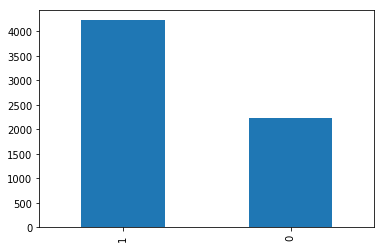

In [22]:
restaurants_LasVegas['is_open'].value_counts().plot.bar()

In [23]:
restaurants_LasVegas.is_open.isnull().sum()

0

In [24]:
restaurants_LasVegas.columns

Index(['address', 'business_id', 'categories', 'city', 'hours', 'is_open',
       'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars',
       'state', 'AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience',
       'BYOB', 'BYOBCorkage', 'BestNights', 'BikeParking',
       'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards',
       'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck',
       'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThru',
       'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour', 'HasTV',
       'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery',
       'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsTableService',
       'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi'],
      dtype='object')

In [0]:
restaurants_LasVegas = restaurants_LasVegas.drop(['address', 'hours'], axis = 1)

In [26]:
restaurants_LasVegas.head()

business_id  ...   WiFi
17   PZ-LZzSlhSe9utkQYU8pFg  ...  u'no'
25   tstimHoMcYbkSC4eBA1wEg  ...  u'no'
75   kANF0dbeoW34s2vwh6Umfw  ...   'no'
111  X8mtoSxY8whtmbDlj0D3Aw  ...    NaN
135  bJP4l_BGq2CudEu0m-wNjg  ...  u'no'

[5 rows x 49 columns]

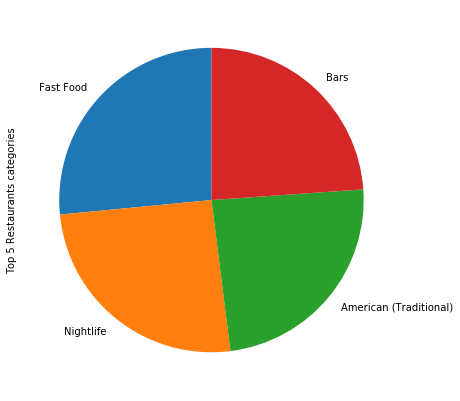

In [27]:
pd.Series(restaurants_LasVegas.categories.str.cat(sep=', ').split(', '), name='Top 5 Restaurants categories').value_counts()[2:6].plot.pie(figsize=(7,7), startangle=90)

# Data Integration

Some missing values in categories data

Check the business categories in Las Vegas

In [0]:
review_df = getDataFramePython('review.json')

In [55]:
review_df.shape

(1242775, 9)

In [54]:
review_df.head()

business_id  cool  ... useful                 user_id
10       8mIrX_LrOnAqWsB5JrOojQ     0  ...      0  FIk4lQQu1eTe2EpzQ4xhBA
22       I4Nr-MVc26qWr08-S3Q1ow     0  ...      0  3CJUJILq7CLHk_9OrvpvQg
23       d_L-rfS1vT3JMzgCUGtiow     0  ...      0  2mxBNBeFrgDszqGS5tdEHA
24       Sfc8Haz2Yri8Mo1L0E0TsA     0  ...      0  8NwU4TRsD3S6gIfBqFzDMQ
27       Gyrez6K8f1AyR7dzW9fvAw     1  ...      0  TTRVdTXKcq-xn6-1IWbwEw
30       dm6sO_Y8JdKTE1ZM955yug     0  ...      0  C_hUvw2z0R-Rv0yZb6QCZA
35       N0apJkxIem2E8irTBRKnHw     0  ...      0  en0xQXlvRk-ZtKlaW4I8eQ
37       IMLrj2klosTFvPRLv56cng     1  ...      1  fxrQSMhHlBv6eJVRdchG9Q
44       ujHiaprwCQ5ewziu0Vi9rw     0  ...      1  SvMGr_Oih7ivtzmnCL-Tmg
48       OVTZNSkSfbl3gVB9XQIJfw     0  ...      0  8vIK6ndl8yzIdmSDnGp0tw
51       X5uxdU9GHoUAqo2wmbg3OQ     1  ...      0  0nTJWagRU8_-KS1x7Zw5Yw
53       eoyvbnRYQe-z85e8Rc6vAg     0  ...      1  ROsjOYL8Jwv-q78mNm69Hg
56       OVTZNSkSfbl3gVB9XQIJfw     0  ...      0  POr1NTWV45OaNCOLfb47fw
62       SU56w479vUfFHsvmvQIf7A     6  ...      7  DoRCeCcJbrsM2BiAKj3trA
67       aNe8ofTYrealxqv7VtFTuw     0  ...      0  ABUt9wCHRsSpa8i7rtNAuQ
72       z9aXGRH8xtqpNDFE5_I3KA     0  ...      0  II8eB5mYk200GW-m-wpsug
73       74C1z6cqEdvJVgETTcEodw     0  ...      0  JggB3gMgP1j5aKHmC4vpBw
78       6xgcHeLad-VaoTIQewK84A     1  ...      0  eJEcCIzJ5bqc0QpRGHSVCw
82       5qG4UHurI1yEozwn25WAFw     3  ...      5  fVK8D0rE9ez1fsQNW_bzRA
85       HhVmDybpU7L50Kb5A0jXTg     0  ...      0  J6YedGZVdhagKKaIqgzIAw
86       5n2dA_QqO4c_7pSK0Of6AQ     1  ...      3  8fpiTkK4MO5jJIXHFV4t5Q
96       Gyrez6K8f1AyR7dzW9fvAw     1  ...      3  N6zhXHPIrCXommDEg0Rw3g
98       XXW_OFaYQkkGOGniujZFHg     0  ...      0  dL1qnksdX2LW4DbNI9XNoA
99       HhVmDybpU7L50Kb5A0jXTg     0  ...      0  2Klw_6aXH_aVcOXPiFHRzg
101      0Yeb_P24sj6MwG2qmuehkA     0  ...      0  fX_E3GLT8iwc2M8Thy2wmA
120      EdY6q0CO2mlATpoTFkvHAw     0  ...      0  zN4M-hA86ps5I6BwXoqcqA
124      biSsdqExmdvIKiFuowOadg     0  ...      0  9iMIjdMY99_igb1FmBXbwg
134      YF4QJ_j-PM7cMZja6K1MwQ     0  ...      0  JXfRZ2jlLfU1BSeG_rw6Jg
141      gOOfBSBZlffCkQ7dr7cpdw     0  ...      0  piYjHlLZQCtg9Q1QT0Lvbw
142      lVfZ2AaYRYHCFenUMQna8g     0  ...      0  U6tZwpRVjUfx-fwDbMAlPA
...                         ...   ...  ...    ...                     ...
6638020  Eau1XrNg91XSzJRn_sCWTg     0  ...      0  jvK7f87WFpnfUwBjhMpDsg
6639869  TNaqJk3Oa__aCLAGHpz7_Q     0  ...      0  lB2-63cY5U99vW5nT6y2rg
6640505  PK0pjMIgWXg_xHJT4axz0A     1  ...      1  Si3aMsOVGSVlsc54iuiPwA
6642293  LJN4A-Wr95ee-Ihurzs36Q     1  ...      0  ofiyrb5MRJQY3XJz6UDYnA
6643623  JGt8I1xjA-2amBuXwXJPIw     0  ...      0  i1DLF75XQ221QE-zPDFlng
6643808  jlTAd5UaI7GdUZ2IJGofaA     0  ...      0  WAb5zPq711dVH7GzxZpLNw
6644506  jjJ06LdxITpFaz_EQaEvWQ     0  ...      1  4FApgKbpJUiRw7RpmTv6kA
6644621  f5PPtPxB7CLgQuHiUBeBcQ     0  ...      0  HRyFtrmf19GTKEM_kOa2pg
6646057  Eau1XrNg91XSzJRn_sCWTg     1  ...      0  aIWXZ3MCfehI-LbxCN4arg
6646145  0xNSLnqLT5miZO9RqSvbhw     0  ...      0  CpUYrxVo1aKXIjca_2rx2Q
6646464  UNVYKGIq6jwcAnP1sT7jgg     0  ...      2  FUQTL1_cnsUUFz1fwQntBQ
6647168  2CMOGkU5NVJEcblyg2LvgQ     0  ...      0  KGUnDe2GyoABNH_Y2r1VBQ
6647225  naO2DJaInOVGG1ZRgA3N6Q     0  ...      0  QdE2T1VEoc-QgNWKTMMixA
6648062  ckc3l8cSuggloG4NlquEFQ     0  ...      0  B856VSGCvHAB-mil7JVprA
6649859  tE3EtnE80cGMm_LF8ufyCg     2  ...      2  OzfKyVa9LPdvqURivDMYIA
6652979  TNaqJk3Oa__aCLAGHpz7_Q     0  ...      0  P7kLiX9m5QGtHOhsDF9row
6663568  vnQ9a0e_DuS4MC9nyEbA5A     0  ...      0  gVmUR8rqUFdbSeZbsg6z_w
6670659  u9V8A-vhdj3mo9Ewl2DS7w     0  ...      0  9dDJQof9g4oLuhrtYTdKsg
6673274  79kLlayzpBQG542C7Z7ocQ     3  ...      7  JM0GL6Dx4EuZ1mprLk5Gyg
6674170  2oJqt8ZDyw0WapZ8Zc268Q     1  ...      2  xECpt0seSDbTmt1mGcfffA
6674363  TNaqJk3Oa__aCLAGHpz7_Q     1  ...      0  _jTNDvLNoUJFJrld7MYBmQ
6675296  xhz5C9HzG6M1LLrI9GZJqw     0  ...      0  7dwgGBhpJ8-qXeAfD24QnQ
6676210  CmBnas2zg5Jyigm

List the resturant ids (business_id) for restaurants in Las Vegas

Aggregate cool, funny, stars, useful values by business_id

In [53]:
review_df = review_df[review_df.business_id.isin(restaurants_LasVegas.business_id)]

AttributeError: ignored

In [0]:
review_df['points'] = review_df['cool'] + review_df['funny'] + review_df['useful']

In [0]:
review_df.shape
review_df = review_org_df.copy()

In [0]:
review_df = review_df.groupby(by='business_id')

In [0]:
review = pd.DataFrame()
review['TotalStars'] = review_df['stars'].sum()
# review['TotalReviews'] = review_df['stars'].count()
# review['AverageStars'] = review_df['stars'].mean()
review['TotalPoints'] = review_df['points'].sum()
review['AveragePoints'] = review_df['points'].mean()
review['TotalCool'] = review_df['cool'].sum()
review['AverageCool'] = review_df['cool'].mean()
review['TotalFunny'] = review_df['funny'].sum()
review['AverageFunny'] = review_df['funny'].mean()
review['TotalUseful'] = review_df['useful'].sum()
review['AverageUseful'] = review_df['useful'].mean()

In [67]:
review.head()

TotalStars  TotalReviews  ...  AverageFunny  AverageUseful
business_id                                       ...                             
--9e1ONYQuAa-CB_Rrw7Tw      6853.0          1661  ...      0.552077       1.065623
--q7kSBRb0vWC8lSkXFByA        28.0             7  ...      0.142857       0.714286
-0BxAGlIk5DJAGVkpqBXxg       131.0            44  ...      0.386364       0.750000
-0RkJ_uIduNLWQrphbADRw       271.0            63  ...      0.666667       1.825397
-153AjTW5luZPK4omEujWA        15.0             5  ...      0.000000       1.000000

[5 rows x 7 columns]

In [68]:
review.shape

(6454, 7)

In [0]:
# Check if the businesses in Las Vegas have reviews on reviews.json
mergeData = pd.merge(left=restaurants_LasVegas, right = review, on='business_id', how='left');

In [70]:
mergeData.shape

(6454, 56)

In [71]:
mergeData.head()

business_id  ... AverageUseful
0  PZ-LZzSlhSe9utkQYU8pFg  ...      1.439024
1  tstimHoMcYbkSC4eBA1wEg  ...      0.888889
2  kANF0dbeoW34s2vwh6Umfw  ...      1.121212
3  X8mtoSxY8whtmbDlj0D3Aw  ...      0.500000
4  bJP4l_BGq2CudEu0m-wNjg  ...      0.666667

[5 rows x 56 columns]

In [72]:
mergeData.isnull().sum()

business_id                      0
categories                       0
city                             0
is_open                          0
latitude                         0
longitude                        0
name                             0
postal_code                      0
review_count                     0
stars                            0
state                            0
AcceptsInsurance              6451
AgesAllowed                   6446
Alcohol                       1150
Ambience                      1202
BYOB                          6442
BYOBCorkage                   6123
BestNights                    6031
BikeParking                   1803
BusinessAcceptsBitcoin        5742
BusinessAcceptsCreditCards     317
BusinessParking                841
ByAppointmentOnly             6317
Caters                        1913
CoatCheck                     6106
Corkage                       6239
DietaryRestrictions           6448
DogsAllowed                   5866
DriveThru           

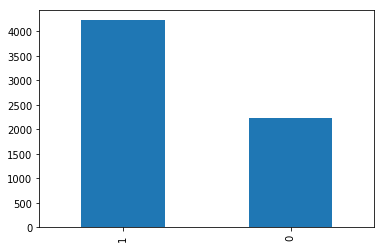

In [73]:
mergeData['is_open'].value_counts().plot.bar()

In [74]:
mergeData.is_open.isna().value_counts()

False    6454
Name: is_open, dtype: int64

In [0]:
mergeData.shape

(1242775, 14)

In [0]:
checkin_df = getDataFrame('checkin.json')

In [100]:
checkin_df.head()

business_id                                               date
0  --1UhMGODdWsrMastO9DZw  2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...
1  --6MefnULPED_I942VcFNA  2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...
2  --7zmmkVg-IMGaXbuVd0SQ  2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...
3  --8LPVSo5i0Oo61X01sV9A                                2016-07-08 16:43:30
4  --9QQLMTbFzLJ_oT-ON3Xw  2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...

In [0]:
checkin_df['TotalCheckins'] = checkin_df['date'].str.split(',').str.len()

In [0]:
checkin_df = checkin_df[checkin_df.business_id.isin(restaurants_LasVegas.business_id)]

In [0]:
checkin_df_bk = checkin_df.copy()

In [0]:
checkin_df = checkin_df.drop(['date'], axis = 1)

In [0]:
checkin_df = checkin_df.groupby(by='business_id')

In [0]:
checkin = pd.DataFrame()

In [0]:
checkin['TotalCheckins'] = checkin_df['TotalCheckins'].sum()

In [108]:
checkin.shape

(6288, 1)

Merge Checkin reviews and business data

In [0]:
mergeData = pd.merge(left=mergeData, right = checkin, on='business_id', how='left');

In [110]:
mergeData.head()

business_id  ... TotalCheckins
0  PZ-LZzSlhSe9utkQYU8pFg  ...          17.0
1  tstimHoMcYbkSC4eBA1wEg  ...         458.0
2  kANF0dbeoW34s2vwh6Umfw  ...         203.0
3  X8mtoSxY8whtmbDlj0D3Aw  ...          15.0
4  bJP4l_BGq2CudEu0m-wNjg  ...           3.0

[5 rows x 57 columns]

In [112]:
mergeData.TotalCheckins.isna().sum()

166

In [0]:
mergeData.TotalCheckins.fillna(0,inplace=True)

In [114]:
mergeData.TotalCheckins.isna().sum()

0

In [0]:
mergeData.to_pickle('VegasBabydata.pki')

In [116]:
mergeData.head()

business_id  ... TotalCheckins
0  PZ-LZzSlhSe9utkQYU8pFg  ...          17.0
1  tstimHoMcYbkSC4eBA1wEg  ...         458.0
2  kANF0dbeoW34s2vwh6Umfw  ...         203.0
3  X8mtoSxY8whtmbDlj0D3Aw  ...          15.0
4  bJP4l_BGq2CudEu0m-wNjg  ...           3.0

[5 rows x 57 columns]

In [123]:
mergeData.corr()

is_open  latitude  ...  AverageUseful  TotalCheckins
is_open        1.000000  0.013410  ...      -0.163851       0.148931
latitude       0.013410  1.000000  ...       0.005869      -0.067247
longitude      0.027194 -0.194324  ...      -0.042695      -0.019896
review_count   0.177058 -0.065186  ...      -0.027981       0.824587
stars         -0.014579 -0.037494  ...       0.096271       0.115687
TotalStars     0.176418 -0.064603  ...      -0.025981       0.815161
TotalReviews   0.177646 -0.065125  ...      -0.027653       0.826276
AverageStars  -0.019559 -0.041224  ...       0.096300       0.113860
AveragePoints -0.138921  0.003081  ...       0.950197       0.003283
AverageCool   -0.114270 -0.010027  ...       0.808031       0.012336
AverageFunny  -0.092316  0.012657  ...       0.785813       0.009009
AverageUseful -0.163851  0.005869  ...       1.000000      -0.007668
TotalCheckins  0.148931 -0.067247  ...      -0.007668       1.000000

[13 rows x 13 columns]

In [0]:
mergeData  = mergeData.drop(['AverageStars'], axis = 1)

In [126]:
mergeData.head()

business_id  ... TotalCheckins
0  PZ-LZzSlhSe9utkQYU8pFg  ...          17.0
1  tstimHoMcYbkSC4eBA1wEg  ...         458.0
2  kANF0dbeoW34s2vwh6Umfw  ...         203.0
3  X8mtoSxY8whtmbDlj0D3Aw  ...          15.0
4  bJP4l_BGq2CudEu0m-wNjg  ...           3.0

[5 rows x 56 columns]

Rounding off float average values

In [0]:
mergeData['cool']= round(mergeData['AverageCool'])
mergeData['funny']= round(mergeData['AverageFunny'])
mergeData['useful']= round(mergeData['AverageUseful'])

In [128]:
mergeData.head()

business_id  ... useful
0  PZ-LZzSlhSe9utkQYU8pFg  ...    1.0
1  tstimHoMcYbkSC4eBA1wEg  ...    1.0
2  kANF0dbeoW34s2vwh6Umfw  ...    1.0
3  X8mtoSxY8whtmbDlj0D3Aw  ...    0.0
4  bJP4l_BGq2CudEu0m-wNjg  ...    1.0

[5 rows x 59 columns]

In [0]:
business_df = getDataFrame('business.json')

In [0]:
business_df.info()

In [0]:
business_df.describe()

In [0]:
business_df.shape

In [0]:
business_df.head()
# the 'attributes' column has complex (nested) data. If we need to use this in our training model. We might need to expand and divide into multiple columns. A helpul file link: https://stackoverflow.com/questions/40588852/pandas-read-nested-json

In [0]:
# checking if there are any missing values for 'is_open' attribute
business_df['is_open'].count()
# the result of shape and count shows there are no missing values

In [0]:
business_df['is_open'].value_counts().plot.bar()

In [0]:
business_df.infer_objects().dtypes

In [0]:
df = getDataFrame('checkin.json')

In [0]:
df['openingDate'] = df['date'].str.split(', ').str[0]

In [0]:
df.head(10)

In [0]:
plt.scatter(business_df.latitude, business_df.longitude)
plt.title('Postal Codes')

In [0]:
model = KMeans(n_clusters = 3)

In [0]:
business_locations = business_df[['latitude', 'longitude']]

In [0]:
business_locations.head()

In [0]:
model.fit(business_locations)

In [0]:
model.labels_

In [0]:
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(business_df.latitude, business_df.longitude,  c=colormap[model.labels_])
plt.title('Postal Codes after K-means')